# 0. Install and Import dependencies

In [20]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.0


In [21]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [22]:
df = pd.read_csv('data/ds2.csv')

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [25]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


In [26]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [27]:
env.signal_features

array([[ 1.00000000e+02,  0.00000000e+00],
       [ 1.00839996e+02,  8.39996000e-01],
       [ 1.00760002e+02, -7.99940000e-02],
       [ 1.00690002e+02, -7.00000000e-02],
       [ 1.01449997e+02,  7.59995000e-01],
       [ 1.02050003e+02,  6.00006000e-01],
       [ 1.02190002e+02,  1.39999000e-01],
       [ 1.01739998e+02, -4.50004000e-01],
       [ 1.01419998e+02, -3.20000000e-01],
       [ 1.00699997e+02, -7.20001000e-01],
       [ 9.96800000e+01, -1.01999700e+00],
       [ 9.97200010e+01,  4.00010000e-02],
       [ 1.00639999e+02,  9.19998000e-01],
       [ 1.01230003e+02,  5.90004000e-01],
       [ 1.01339996e+02,  1.09993000e-01],
       [ 1.01779999e+02,  4.40003000e-01],
       [ 1.01839996e+02,  5.99970000e-02],
       [ 1.02070000e+02,  2.30004000e-01],
       [ 1.02779999e+02,  7.09999000e-01],
       [ 1.03000000e+02,  2.20001000e-01],
       [ 1.04230003e+02,  1.23000300e+00],
       [ 1.04410004e+02,  1.80001000e-01],
       [ 1.04139999e+02, -2.70005000e-01],
       [ 1.

# 2. Build Environment

In [28]:
env.action_space

Discrete(2)

info {'total_reward': -1.2099829999999514, 'total_profit': 0.6786005413782139, 'position': 0}


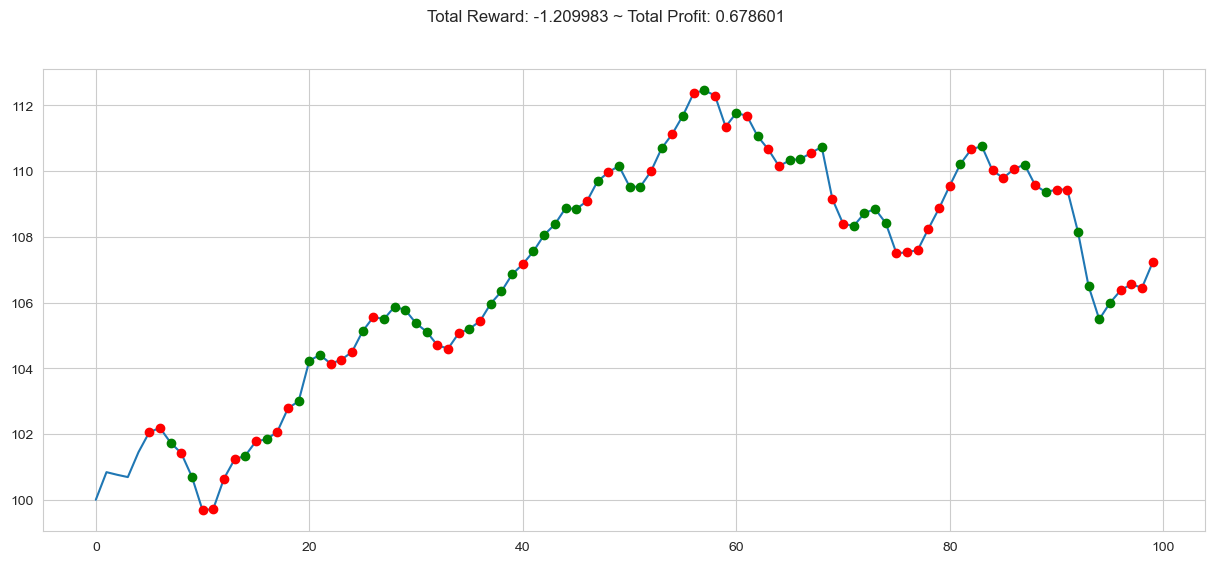

In [29]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [30]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [31]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 450      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.589   |
|    explained_variance | 7.75e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.206    |
|    value_loss         | 0.451    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 504      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00663 |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.0292  |
|    value_loss      

# 4. Evaluation

In [32]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -1.0299969999999945, 'total_profit': 0.900245376457207, 'position': 1}


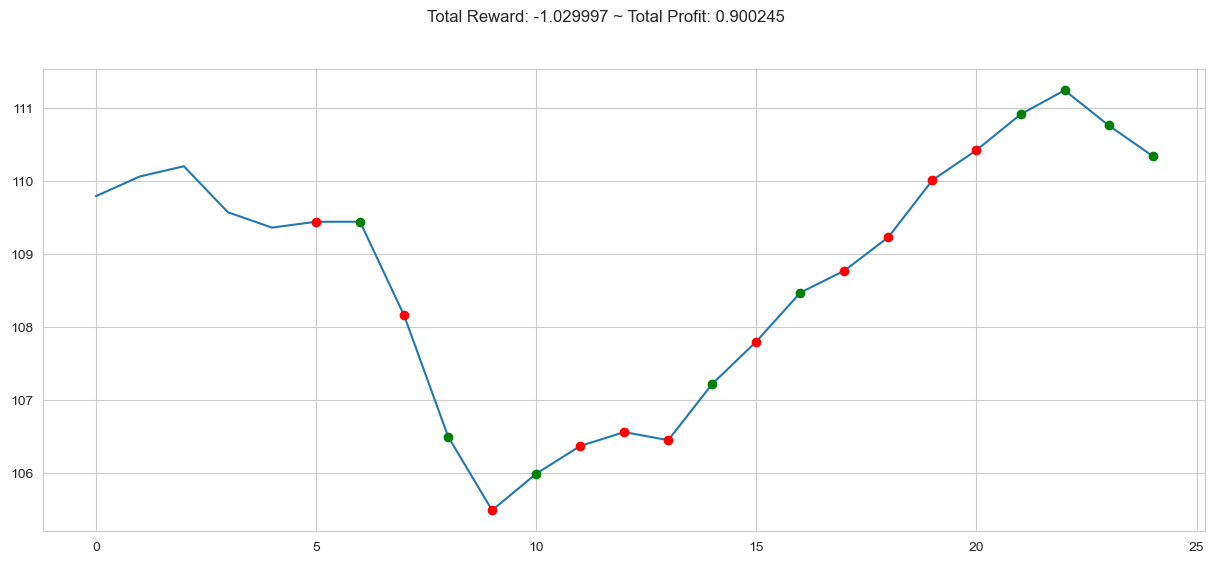

In [33]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()